In [ ]:
pip install scikit-learn

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data =pd.read_csv('Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [5]:
data.drop("Serial No.", axis=1, inplace=True)

In [6]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [7]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']  = data['GRE Score'].fillna(data['GRE Score'].mean())

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    float64
 1   TOEFL Score        500 non-null    float64
 2   University Rating  500 non-null    float64
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 31.4 KB


In [30]:
X = data.loc[:,"GRE Score":"Research"]
Y = data["Chance of Admit"]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25)

In [31]:
x_train.shape

(375, 7)

In [32]:
x_test.shape

(125, 7)

### Scaling

In [33]:
scaler =StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [34]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
276,329.000000,113.0,5.0,5.0,4.5,9.45,1
83,322.000000,115.0,5.0,4.0,4.5,9.36,1
471,311.000000,103.0,3.0,2.0,4.0,8.09,0
122,310.000000,106.0,4.0,1.5,2.5,8.36,0
85,319.000000,103.0,3.0,4.5,3.5,8.66,0
...,...,...,...,...,...,...,...
171,334.000000,117.0,5.0,4.0,4.5,9.07,1
106,329.000000,111.0,4.0,4.5,4.5,9.18,1
131,303.000000,105.0,5.0,5.0,4.5,8.65,0
476,304.000000,104.0,3.0,2.5,2.0,8.12,0


In [35]:
x_train_scaled

array([[ 1.15471634,  0.96950232,  1.69232204, ...,  1.12138689,
         1.49557282,  0.90088523],
       [ 0.51587567,  1.30263628,  1.69232204, ...,  1.12138689,
         1.34267211,  0.90088523],
       [-0.48801682, -0.69616749, -0.08782036, ...,  0.57454673,
        -0.81492681, -1.1100193 ],
       ...,
       [-1.21812044, -0.36303353,  1.69232204, ...,  1.12138689,
         0.13645539, -1.1100193 ],
       [-1.12685749, -0.52960051, -0.08782036, ..., -1.61281391,
        -0.76395991, -1.1100193 ],
       [ 0.0192923 ,  0.80293534,  0.80225084, ...,  1.12138689,
         0.90095895,  0.90088523]])

#### Modelling

In [36]:
regression = LinearRegression()
regression.fit(x_train_scaled,y_train)

LinearRegression()

In [37]:
### Training score

regression.score(x_train_scaled,y_train)

0.8069685657122261

#### prediction

In [38]:
y_train

276    0.89
83     0.92
471    0.64
122    0.57
85     0.76
       ... 
171    0.89
106    0.87
131    0.77
476    0.62
12     0.78
Name: Chance of Admit, Length: 375, dtype: float64

#### testing / Validation

In [39]:
y_test

174    0.87
489    0.65
358    0.70
58     0.36
15     0.54
       ... 
225    0.61
73     0.84
37     0.58
291    0.56
478    0.71
Name: Chance of Admit, Length: 125, dtype: float64

In [40]:
regression.predict(x_test_scaled)

array([0.810181  , 0.72053271, 0.54808114, 0.41964091, 0.64434974,
       0.61839541, 0.67562547, 0.8768817 , 0.7421436 , 0.64994891,
       0.76258097, 0.73707286, 0.81873416, 0.95138635, 0.75241294,
       0.69156275, 0.657528  , 0.8062632 , 0.74800126, 0.77587877,
       0.80428031, 0.69422244, 0.51925015, 0.5764496 , 0.64964287,
       0.61738944, 0.72001311, 0.51200294, 0.65980104, 0.75607462,
       0.94280977, 0.57133492, 0.6587225 , 0.58194011, 0.95987022,
       1.00139348, 0.51210801, 0.79135485, 0.5725676 , 0.77699443,
       0.5846447 , 0.64535091, 0.68063789, 0.77836463, 0.80436489,
       0.76956951, 0.50790301, 0.89559968, 0.63001307, 0.5955913 ,
       0.7888848 , 0.53160607, 0.5061502 , 0.69002844, 0.97012323,
       0.76346571, 0.8116601 , 0.74962887, 0.60844971, 0.90471605,
       0.56094942, 0.6225031 , 0.72350508, 0.68216626, 0.70009595,
       0.49291728, 0.85897361, 0.85778943, 0.7654362 , 0.73105705,
       0.42910249, 0.70133497, 0.83748927, 0.85446108, 0.64978

In [41]:
### Testing / Validation Score
regression.score(x_test_scaled, y_test)

0.8542206599103999

### Polynomial Regression

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

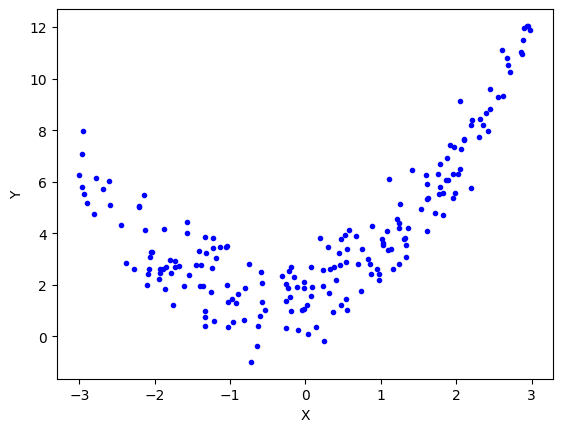

In [62]:
X = 6 * np.random.rand(200, 1) - 3 

y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200, 1)
#equation used -> y = 0.8x^2 + 0.9x + 2
#visualize the data
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

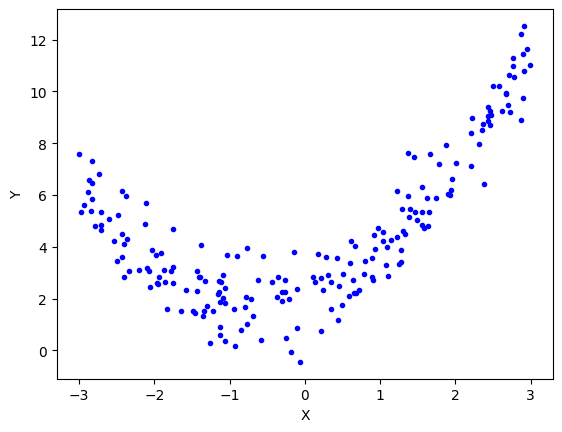

In [43]:
import numpy as np
import matplotlib.pyplot as plt

X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200, 1)
#equation used -> y = 0.8x^2 + 0.9x + 2
#visualize the data
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [45]:
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.28193605063531835


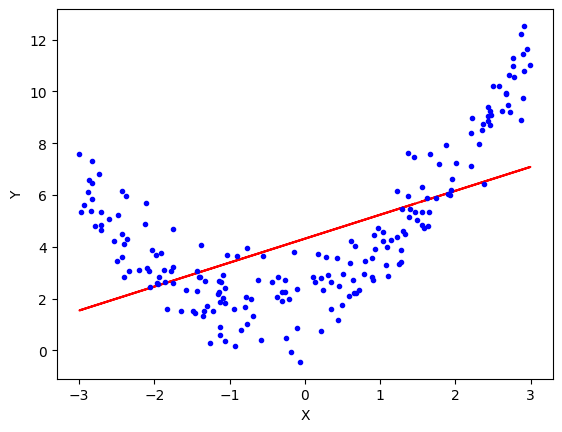

In [46]:
plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

##### Apply Polynomial

In [47]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
poly.fit(x_train)
x_train_trans = poly.transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.9020207909490792


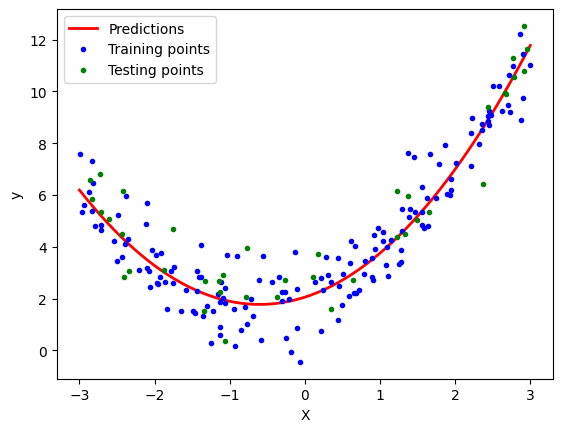

In [48]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()